In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

In [36]:
# Step 1: Load the Data
data = pd.read_csv(r"C:\Users\DELL 7470\Desktop\PREG COMPLICATION\Gestational Diabetes\Gestational Diabetes.csv")  # Replace with your actual CSV file path

In [37]:
data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [38]:
print(data.columns)

Index(['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity',
       'Prediction'],
      dtype='object')


Model Accuracy: 0.8325123152709359


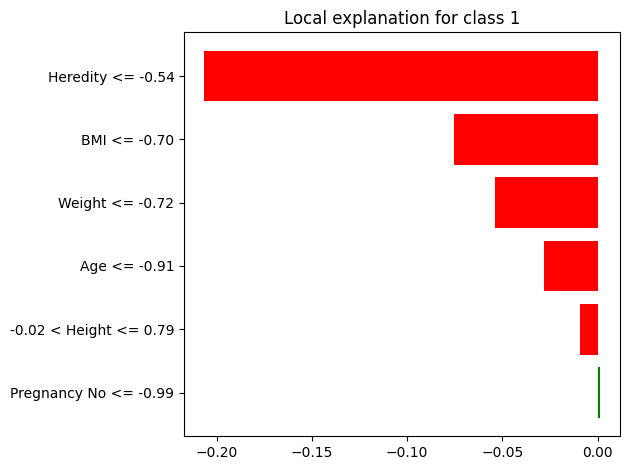

In [39]:
# Step 2: Preprocess the Data
# Assuming the target column is named 'Prediction'
target_column = 'Prediction'
feature_columns = data.columns.drop(target_column)

X = data[feature_columns]
y = data[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Remove zero variance columns
non_zero_variance_columns = np.var(X_scaled, axis=0) > 0
X_scaled = X_scaled[:, non_zero_variance_columns]
valid_feature_names = feature_columns[non_zero_variance_columns]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train a Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Step 4: Make Predictions
predictions = rf_clf.predict(X_test)
print(f"Model Accuracy: {rf_clf.score(X_test, y_test)}")

# Step 5: Interpret with LIME
# Define the LIME explainer with standardized data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_columns,
    class_names=[str(label) for label in sorted(y.unique())],
    mode='classification'
)

# Explain the first prediction
i = 0  # Index of the instance to be explained
explanation = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=rf_clf.predict_proba,
    num_features=6
)

# Plot the explanation
fig = explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel(r"C:\Users\DELL 7470\Desktop\HULL RESEARCH WORK\GestationalDiabeticDataSet.xlsx")  # Replace with your actual Excel file path

data.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


Model Accuracy: 0.9673758865248226
Correct: GDM
{'Case Number': np.float64(-1.4121742471663437), 'Age': np.float64(0.0678838646110674), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.04729734725107937), 'Hemoglobin': np.float64(-0.8905926494227271), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


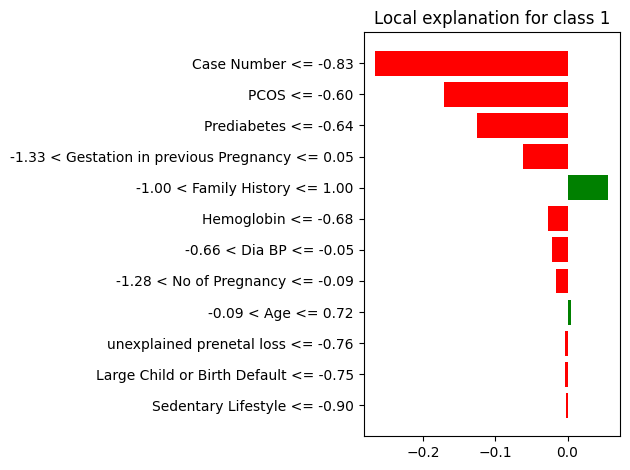

Correct: NON GDM
{'Case Number': np.float64(0.5670316914509257), 'Age': np.float64(-1.0669632622711114), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(1.4388450652631084), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(1.339925548608148), 'PCOS': np.float64(1.6667738443566693), 'Dia BP': np.float64(0.39214163287558496), 'Hemoglobin': np.float64(1.1483573298993195), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(1.5531873981916215)}


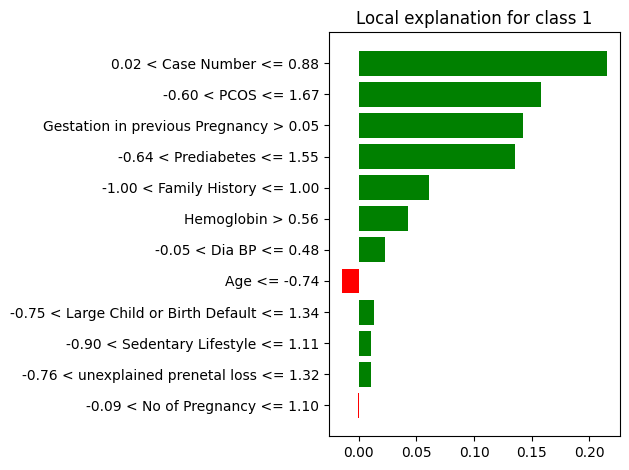

Correct: GDM
{'Case Number': np.float64(1.6224771621932035), 'Age': np.float64(-1.0669632622711114), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(1.4388450652631084), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(1.6667738443566693), 'Dia BP': np.float64(-0.6625119194284094), 'Hemoglobin': np.float64(0.7191047026736251), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


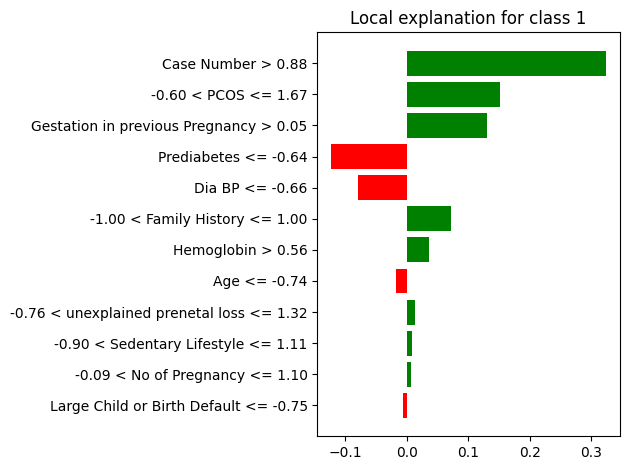

Correct: GDM
{'Case Number': np.float64(-0.9984474844265867), 'Age': np.float64(-0.2563581716409837), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.13518514327641223), 'Hemoglobin': np.float64(-1.0515623846323627), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


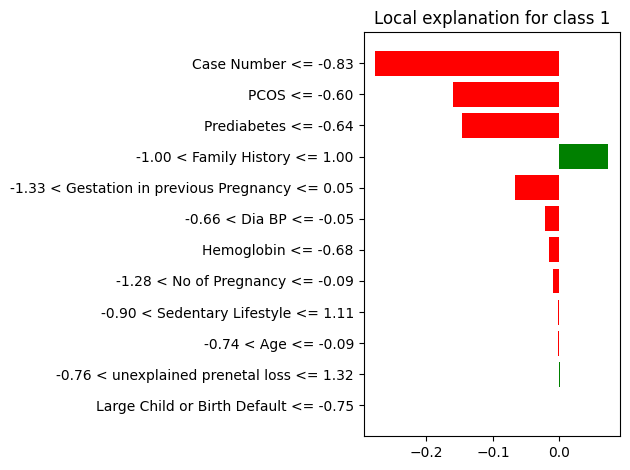

Correct: GDM
{'Case Number': np.float64(-1.437725068618205), 'Age': np.float64(-0.4184791897670092), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(0.12847824479958636), 'Hemoglobin': np.float64(0.021569183431872144), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


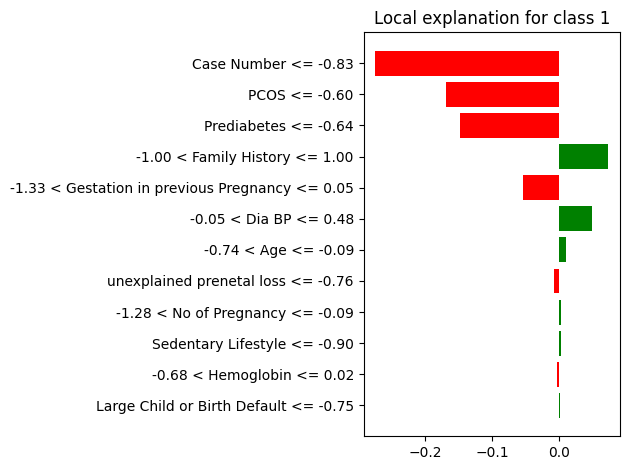

Correct: NON GDM
{'Case Number': np.float64(0.9611039761507891), 'Age': np.float64(-0.09423715351495814), 'No of Pregnancy': np.float64(-1.2835883078069432), 'Gestation in previous Pregnancy': np.float64(-1.330430858871457), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(1.339925548608148), 'PCOS': np.float64(1.6667738443566693), 'Dia BP': np.float64(-0.2230729393017451), 'Hemoglobin': np.float64(-0.9979058062291511), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


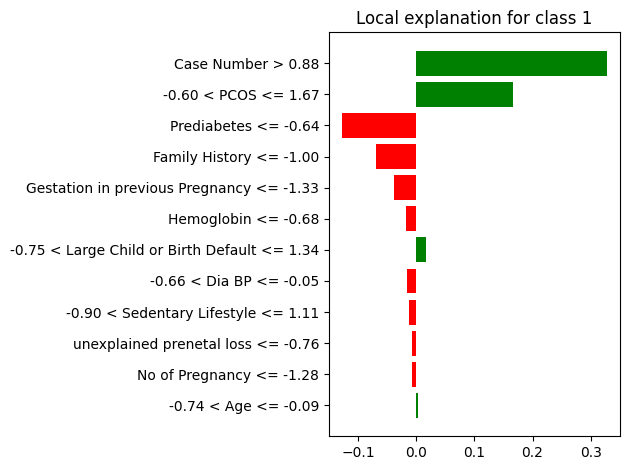

Correct: NON GDM
{'Case Number': np.float64(0.5965134085107658), 'Age': np.float64(1.0406099733672205), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(1.4388450652631084), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(1.339925548608148), 'PCOS': np.float64(1.6667738443566693), 'Dia BP': np.float64(0.12847824479958636), 'Hemoglobin': np.float64(1.4166402219153782), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(1.5531873981916215)}


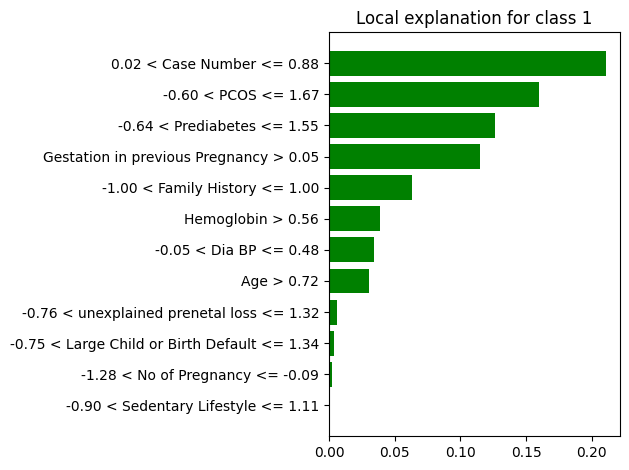

Correct: GDM
{'Case Number': np.float64(-0.14642586139720612), 'Age': np.float64(-0.9048422441450857), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-1.1898386955804066), 'Hemoglobin': np.float64(-1.8027544822773272), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


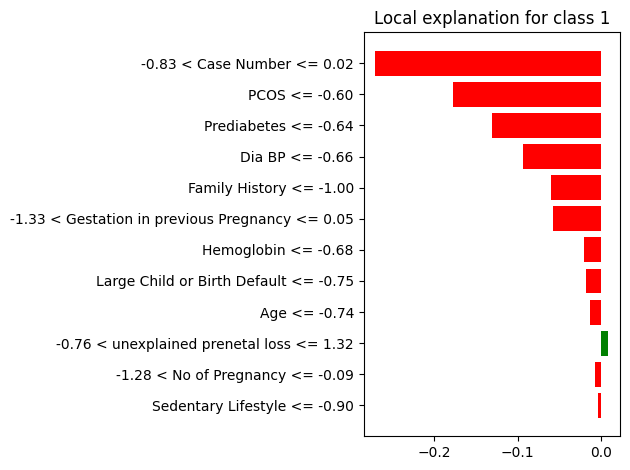

Correct: GDM
{'Case Number': np.float64(-1.5949608929373527), 'Age': np.float64(-1.7154473347752135), 'No of Pregnancy': np.float64(-1.2835883078069432), 'Gestation in previous Pregnancy': np.float64(-1.330430858871457), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.926175307504408), 'Hemoglobin': np.float64(-0.5149966006002452), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


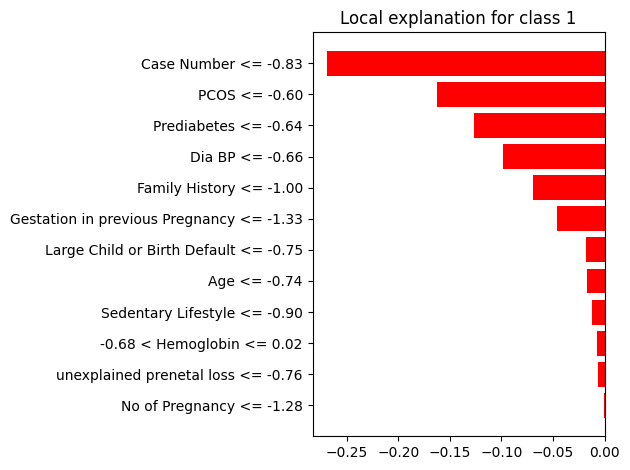

Correct: GDM
{'Case Number': np.float64(0.09630694239547785), 'Age': np.float64(-0.4184791897670092), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-1.014063103529741), 'Hemoglobin': np.float64(-0.3540268653906097), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


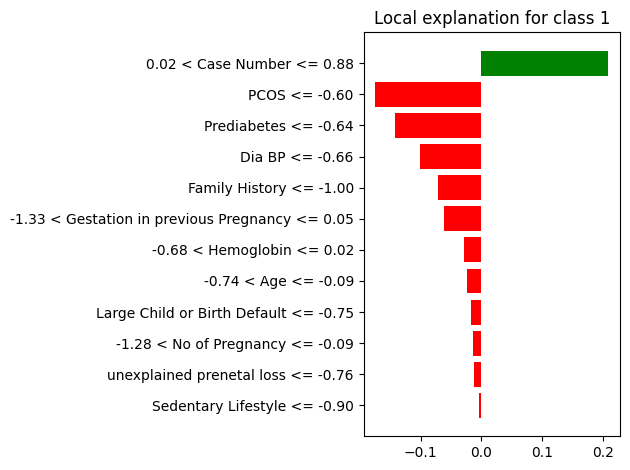

Correct: GDM
{'Case Number': np.float64(-1.177303234589617), 'Age': np.float64(-0.2563581716409837), 'No of Pregnancy': np.float64(-1.2835883078069432), 'Gestation in previous Pregnancy': np.float64(-1.330430858871457), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.13518514327641223), 'Hemoglobin': np.float64(-1.5881281686644801), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


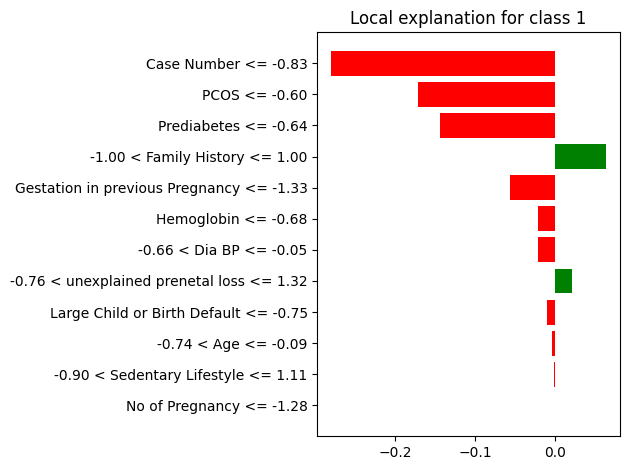

Correct: GDM
{'Case Number': np.float64(-0.9335877068949383), 'Age': np.float64(1.0406099733672205), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.39884853135241083), 'Hemoglobin': np.float64(0.5581349674639895), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


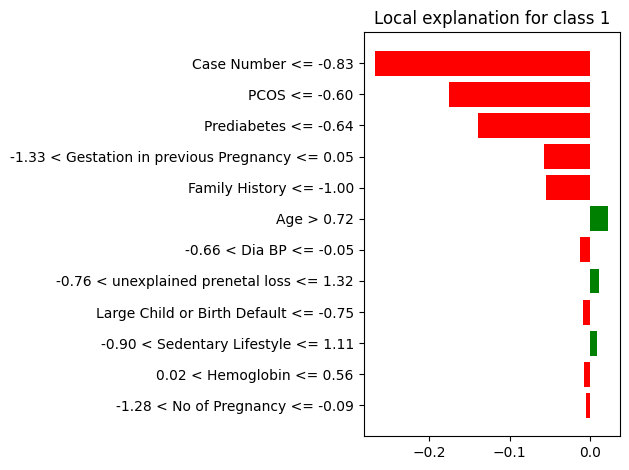

Correct: NON GDM
{'Case Number': np.float64(0.4029167998178155), 'Age': np.float64(0.554246918989144), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(1.4388450652631084), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(1.1831317971035806), 'Hemoglobin': np.float64(1.20201390830253), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(1.5531873981916215)}


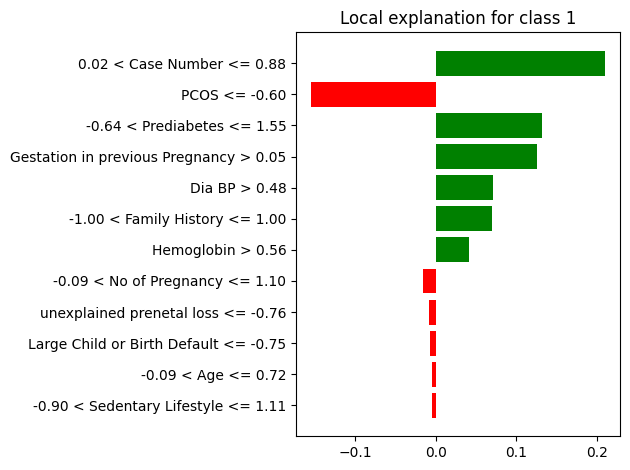

Correct: GDM
{'Case Number': np.float64(-0.9070541615410822), 'Age': np.float64(0.7163679371151694), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-0.39884853135241083), 'Hemoglobin': np.float64(0.021569183431872144), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


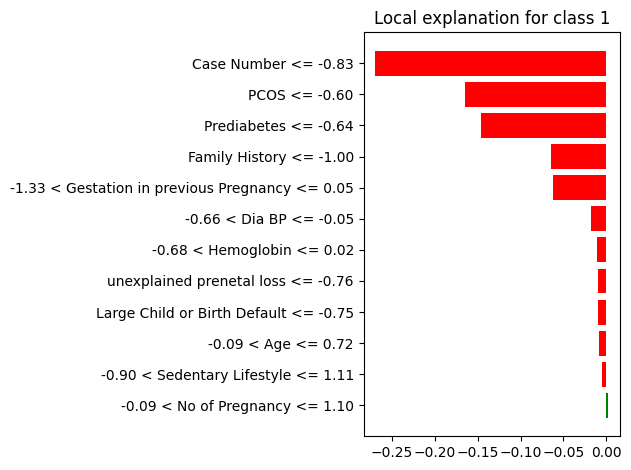

Correct: GDM
{'Case Number': np.float64(0.08549697947353646), 'Age': np.float64(-2.0396893710272646), 'No of Pregnancy': np.float64(-1.2835883078069432), 'Gestation in previous Pregnancy': np.float64(-1.330430858871457), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-1.4535020836564052), 'Hemoglobin': np.float64(0.0752257618350837), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


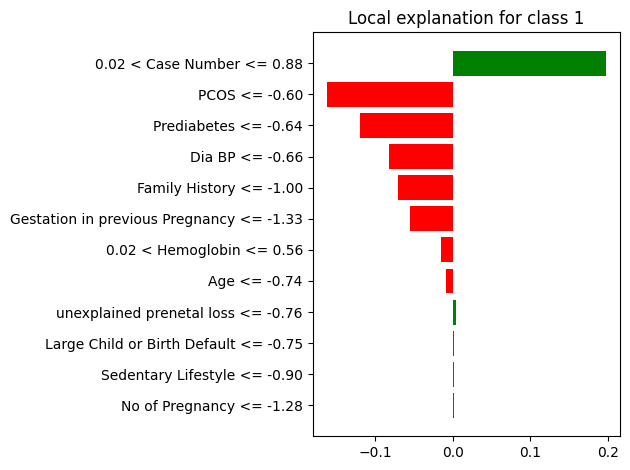

Correct: NON GDM
{'Case Number': np.float64(1.0230155819764535), 'Age': np.float64(-0.2563581716409837), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(1.339925548608148), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(0.3042538368502521), 'Hemoglobin': np.float64(2.167832319560342), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(1.5531873981916215)}


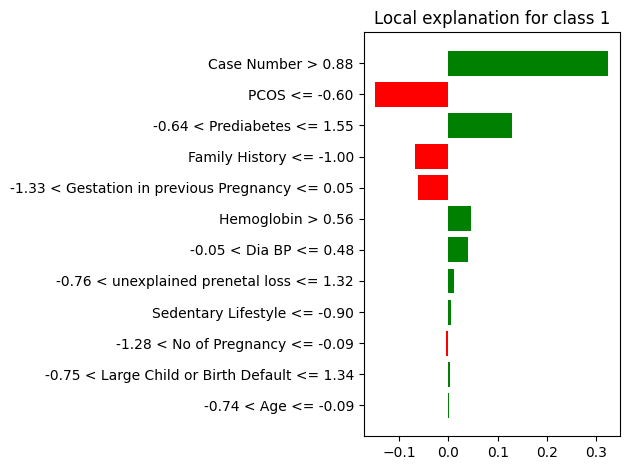

Correct: GDM
{'Case Number': np.float64(0.006879067313962704), 'Age': np.float64(0.7163679371151694), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(1.3194913954885321), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-1.014063103529741), 'Hemoglobin': np.float64(0.9337310162864714), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


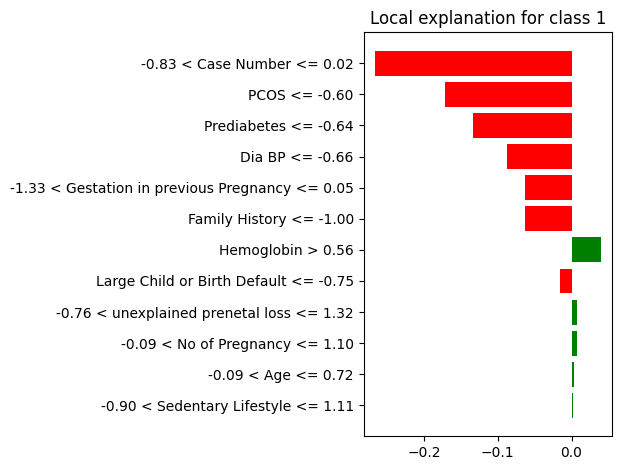

Correct: GDM
{'Case Number': np.float64(-0.7262329635740625), 'Age': np.float64(-0.09423715351495814), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(1.339925548608148), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(0.040590448774253496), 'Hemoglobin': np.float64(-0.5149966006002452), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(-0.6438373123322413)}


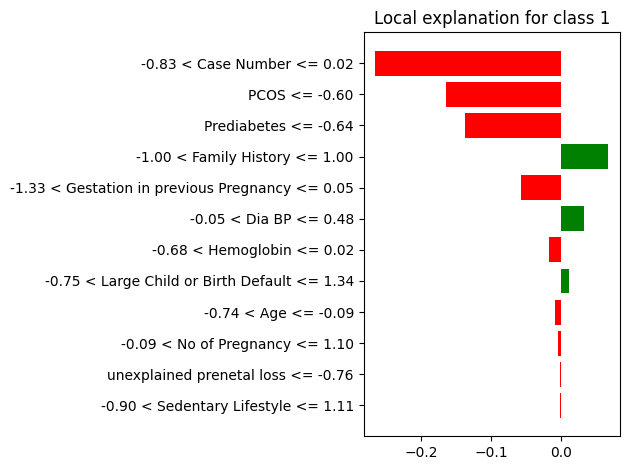

Correct: GDM
{'Case Number': np.float64(0.09728966629747252), 'Age': np.float64(-0.2563581716409837), 'No of Pregnancy': np.float64(-0.09100823795468302), 'Gestation in previous Pregnancy': np.float64(0.05420710319582552), 'Family History': np.float64(-0.9963188321897356), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(-1.3656142876310724), 'Hemoglobin': np.float64(0.0752257618350837), 'Sedentary Lifestyle': np.float64(-0.9038862258483368), 'Prediabetes': np.float64(-0.6438373123322413)}


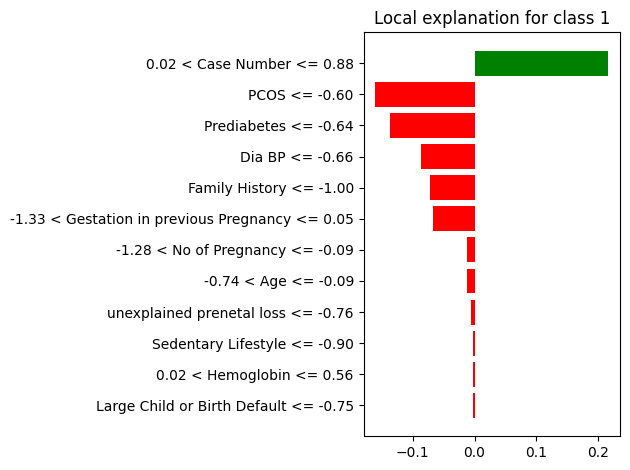

Correct: NON GDM
{'Case Number': np.float64(1.1792686823936063), 'Age': np.float64(1.526973027745297), 'No of Pregnancy': np.float64(1.1015718318975773), 'Gestation in previous Pregnancy': np.float64(1.4388450652631084), 'Family History': np.float64(1.003694768874512), 'unexplained prenetal loss': np.float64(-0.7578677689139135), 'Large Child or Birth Default': np.float64(-0.7463101222592203), 'PCOS': np.float64(-0.5999614185126436), 'Dia BP': np.float64(0.39214163287558496), 'Hemoglobin': np.float64(0.18253891864150776), 'Sedentary Lifestyle': np.float64(1.10633392942951), 'Prediabetes': np.float64(1.5531873981916215)}


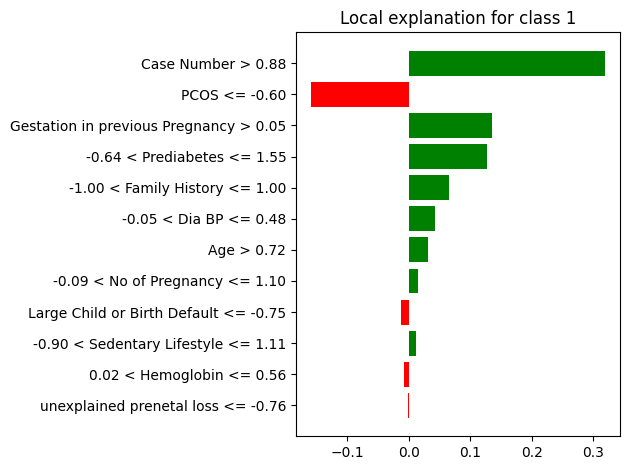

In [41]:
# Step 2: Preprocess the Data
# Assuming the target column is named 'Prediction'
target_column = 'Class Label(GDM /Non GDM)'
feature_columns = data.columns.drop(target_column)

X = data[feature_columns]
y = data[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Remove zero variance columns
non_zero_variance_columns = np.var(X_scaled, axis=0) > 0
X_scaled = X_scaled[:, non_zero_variance_columns]
valid_feature_names = feature_columns[non_zero_variance_columns]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train a Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Step 4: Make Predictions
predictions = rf_clf.predict(X_test)
print(f"Model Accuracy: {rf_clf.score(X_test, y_test)}")

# Step 5: Interpret with LIME
# Define the LIME explainer with standardized data

class_names = [str(label) for label in sorted(y.unique())]

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=valid_feature_names.tolist(),
    class_names= class_names,
    mode='classification'
)

for i in range(20):
    correct_label = y_test.iloc[i] 
    print('Correct:', 'NON GDM' if correct_label else 'GDM')
    print(dict(zip(valid_feature_names, X_test[i])))

    # Explain the instance using scaled data
    explanation = explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=rf_clf.predict_proba,
        num_features=25
    )

    # Plot the explanation
    label_index = class_names.index(str(int(correct_label))) # Ensure proper mapping 
    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
